<a href="https://colab.research.google.com/github/n1lays1ngh/Image-Recognition-on-CIFAR-10-Dataset/blob/main/IMAGE_RECOGNITION_ON_CIFAR_10_DATASET_USING_CONVOLUTIONAL_NEURAL_NETWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE RECOGNITION ON CIFAR-10 DATASET USING CNN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 1.Loading and preparing the data

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
x_train , x_val ,y_train,y_val = train_test_split(x_train , y_train , test_size = 0.2 , random_state = 42)

#### Example of the data set

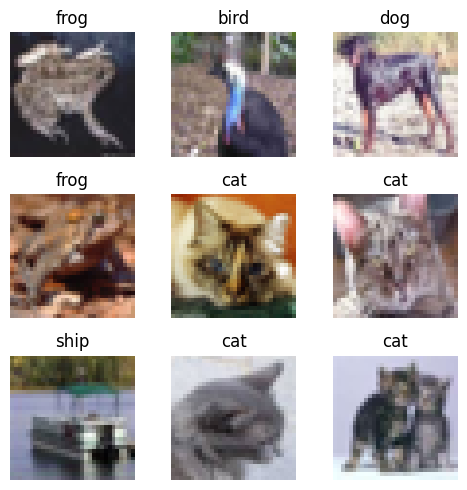

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize = (5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    # plt.title(class_names[int(y_train[i])])
    plt.title(class_names[y_train[i].item()])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
print('Shape of x_train',x_train.shape)
print('data type of x_train',x_train.dtype)
print('Number of dimensions of x_train',x_train.ndim)

Shape of x_train (40000, 32, 32, 3)
data type of x_train float64
Number of dimensions of x_train 4


In [11]:
print(y_train.shape)

(40000, 10)


In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_val = to_categorical(y_val, 10)

In [10]:
model1 = Sequential([
    #1st layer
    Conv2D(32,(3,3),activation = 'relu',input_shape = (32,32,3)),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.2),

    #Second Layer
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.2),



    Flatten(),


    Dense(128,activation = 'relu'),
    Dropout(0.40),
    Dense(10,activation = 'softmax')



])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model1.compile(optimizer = 'adam' , loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [13]:
history = model1.fit(
    x_train,
    y_train,
    epochs = 20,
    verbose = 1,
    validation_data = (x_val,y_val)

)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.2996 - loss: 1.8761 - val_accuracy: 0.5147 - val_loss: 1.3665
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4965 - loss: 1.3929 - val_accuracy: 0.5843 - val_loss: 1.1782
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5560 - loss: 1.2441 - val_accuracy: 0.6217 - val_loss: 1.0634
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5892 - loss: 1.1724 - val_accuracy: 0.6393 - val_loss: 1.0316
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6108 - loss: 1.0992 - val_accuracy: 0.6571 - val_loss: 0.9789
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6292 - loss: 1.0642 - val_accuracy: 0.6716 - val_loss: 0.9376
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6371 - loss: 1.0299 - val_accuracy: 0.6841 - val_loss: 0.9075
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6499 - loss: 0.9938 

In [15]:
test_loss , test_accuracy = model1.evaluate(
    x_test,
    y_test,
    verbose = 1

)

print(f'\nTest Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7088 - loss: 0.8240

Test Accuracy: 0.7115
Test Loss: 0.8343


In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_prob = model1.predict(x_test)
y_pred = np.argmax(y_pred_prob,axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [20]:
y_true = np.argmax(y_test, axis=1)

### Confusion Matrix


In [21]:
cm = confusion_matrix(y_true, y_pred)

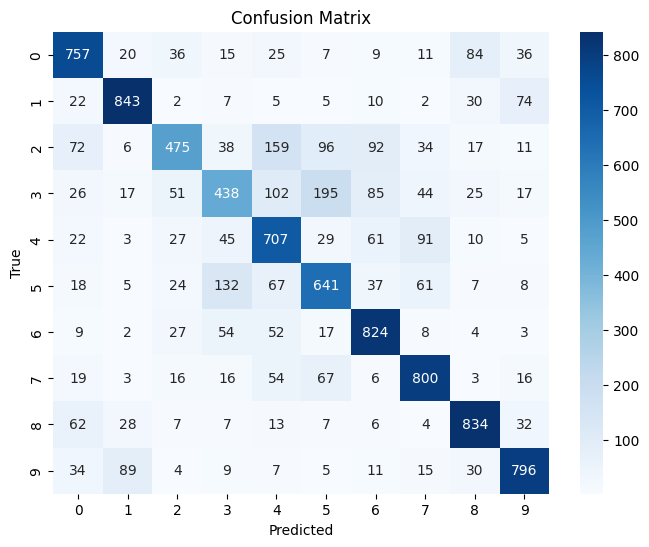

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1000
           1       0.83      0.84      0.84      1000
           2       0.71      0.47      0.57      1000
           3       0.58      0.44      0.50      1000
           4       0.59      0.71      0.65      1000
           5       0.60      0.64      0.62      1000
           6       0.72      0.82      0.77      1000
           7       0.75      0.80      0.77      1000
           8       0.80      0.83      0.82      1000
           9       0.80      0.80      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [ ]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

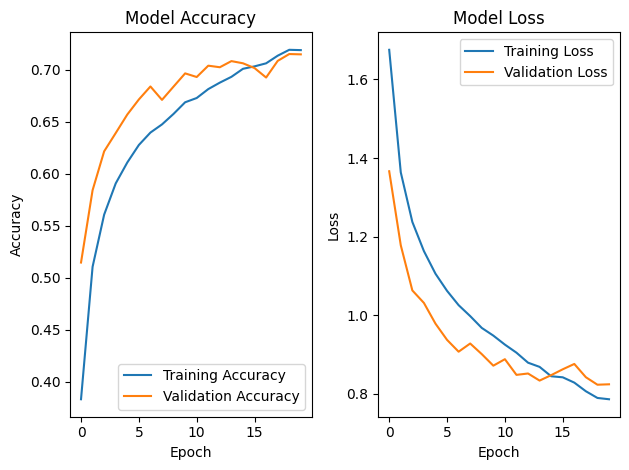

In [24]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


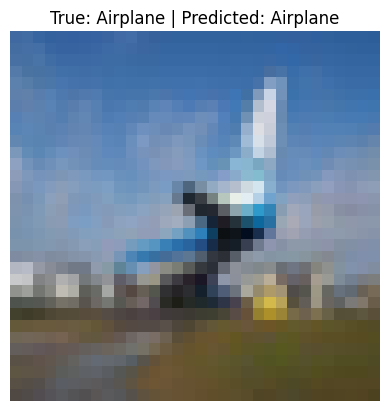

In [25]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Select a random image from the test set
random_index = random.randint(0, len(x_test) - 1)
random_image = x_test[random_index]

# Get the true label index (since y_test is one-hot encoded)
true_label = class_names[np.argmax(y_test[random_index])]

# Predict the class
prediction = model1.predict(np.expand_dims(random_image, axis=0))
predicted_class = class_names[np.argmax(prediction)]

# Plot the image with prediction results
plt.imshow(random_image)
plt.title(f"True: {true_label} | Predicted: {predicted_class}")
plt.axis('off')
plt.show()

In [12]:

model2 = Sequential([
    # 1st Convolutional Block
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    # 2nd Convolutional Block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    # 3rd Convolutional Block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    # Global Average Pooling instead of Flatten
    GlobalAveragePooling2D(),

    # Fully Connected Layer
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(64,activation = 'relu'),
    Dropout(0.2),
    # Output Layer
    Dense(10, activation='softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,562 (467.04 KB)

 Trainable params: 119,114 (465.29 KB)

 Non-trainable params: 448 (1.75 KB)

In [14]:


model2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

DATA AUGMENTATION FOR INCREASING THE DATASET


In [15]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.1,
    brightness_range=[0.8, 1.2]
)

datagen.fit(x_train)

In [16]:
# Reduce LR on plateau
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)



In [17]:
# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)


In [18]:
history2 = model2.fit(
    x = x_train,
    y = y_train,
    validation_data=(x_val, y_val),
    epochs= 40,
    callbacks = [early_stop,lr_scheduler]

)

Epoch 1/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.3051 - loss: 1.8730 - val_accuracy: 0.3252 - val_loss: 2.3053 - learning_rate: 0.0010
Epoch 2/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4940 - loss: 1.4042 - val_accuracy: 0.4828 - val_loss: 1.4627 - learning_rate: 0.0010
Epoch 3/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5553 - loss: 1.2470 - val_accuracy: 0.4801 - val_loss: 1.4150 - learning_rate: 0.0010
Epoch 4/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5856 - loss: 1.1800 - val_accuracy: 0.5983 - val_loss: 1.0999 - learning_rate: 0.0010
Epoch 5/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6016 - loss: 1.1288 - val_accuracy: 0.5417 - val_loss: 1.2539 - learning_rate: 0.0010
Epoch 6/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6216 - loss: 1.0688 - val_accuracy: 0.5466 - val_loss: 1.2389 - learning_rate: 0.0010
Epoch 7/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6290 

In [19]:
test_loss , test_accuracy = model2.evaluate(
    x_test,
    y_test,
    verbose = 1

)

print(f'\nTest Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7742 - loss: 0.6440

Test Accuracy: 0.7726
Test Loss: 0.6447


In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
y2_pred_prob = model2.predict(x_test)
y2_pred = np.argmax(y2_pred_prob,axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [25]:
y2_true = np.argmax(y_test, axis=1)

In [26]:
cm2 = confusion_matrix(y2_true, y2_pred)

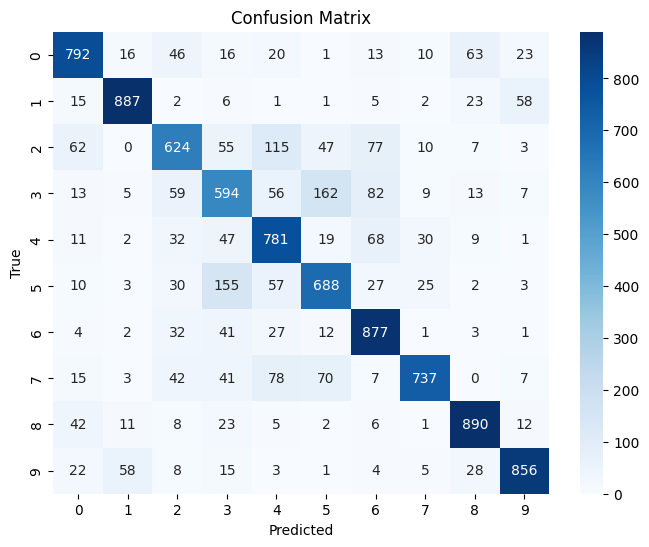

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [28]:
print("Classification Report:")
print(classification_report(y2_true, y2_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1000
           1       0.90      0.89      0.89      1000
           2       0.71      0.62      0.66      1000
           3       0.60      0.59      0.60      1000
           4       0.68      0.78      0.73      1000
           5       0.69      0.69      0.69      1000
           6       0.75      0.88      0.81      1000
           7       0.89      0.74      0.81      1000
           8       0.86      0.89      0.87      1000
           9       0.88      0.86      0.87      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



In [29]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

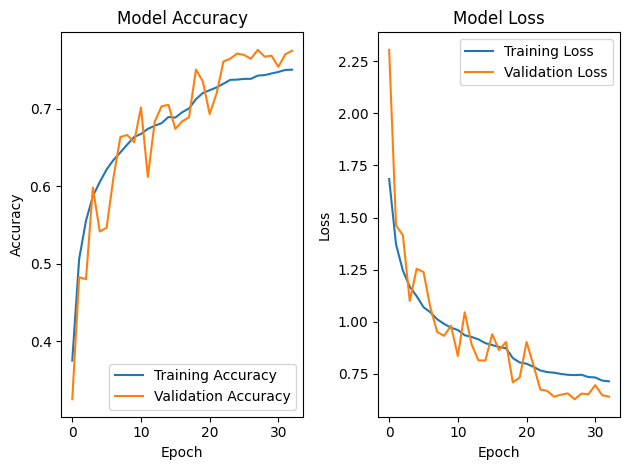

In [30]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


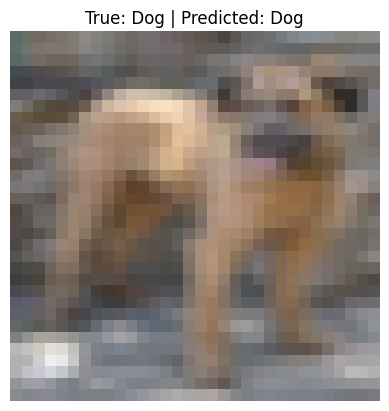

In [34]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Select a random image from the test set
random_index = random.randint(0, len(x_test) - 1)
random_image = x_test[random_index]

# Get the true label index (since y_test is one-hot encoded)
true_label = class_names[np.argmax(y_test[random_index])]

# Predict the class
prediction = model2.predict(np.expand_dims(random_image, axis=0))
predicted_class = class_names[np.argmax(prediction)]


# Plot the image with prediction results
plt.imshow(random_image)
plt.title(f"True: {true_label} | Predicted: {predicted_class}")
plt.axis('off')
plt.show()